<div align="center">
  <h1 align="center">Figure 2: Plot timeseries, residuals, and models</h1>
  <p align="center"><i>Marie E Galteau, 2023</i></p>

  <table align="cener">
    <tr>
    <td><img align="right" src="https://open-neuroscience.com/post/nilearn/featured.png" alt="image" width="150" /></td>
    <td><img align="right" src="https://d33wubrfki0l68.cloudfront.net/e33fd6f372aa5d51e7b0de4bd763bd983251881e/4b0f4/blog/customising-matplotlib/matplot_title_logo.png" alt="image" width="200" /></td>
    </tr>
  </table>
</div>


---

In [1]:
import pandas as pd
import numpy as np
import nibabel as nib
from nilearn import plotting
import nilearn.plotting as plotting
import matplotlib.pyplot as plt
from nilearn.maskers import NiftiSpheresMasker
from numpy import genfromtxt
import glob 

In [2]:
# Init var
analysis_folder = '/project/4180000.19/multirat_stim/scratch/rabies_test/'
first_level_path = analysis_folder+'first_level/'

glover_path = analysis_folder+'first_level/glover/mask_ROIs/'
spm_path = analysis_folder+'first_level/spm/mask_ROIs/'
Two_gammas_path = analysis_folder+'first_level/Two_gammas/mask_ROIs/'
Peak_span_path = analysis_folder+'first_level/Peak_span/mask_ROIs/'

hrf_path = Peak_span_path
hrf = 'Peak_span'
#hrf = 'Peak_span'
#hrf = 'Two_gammas'

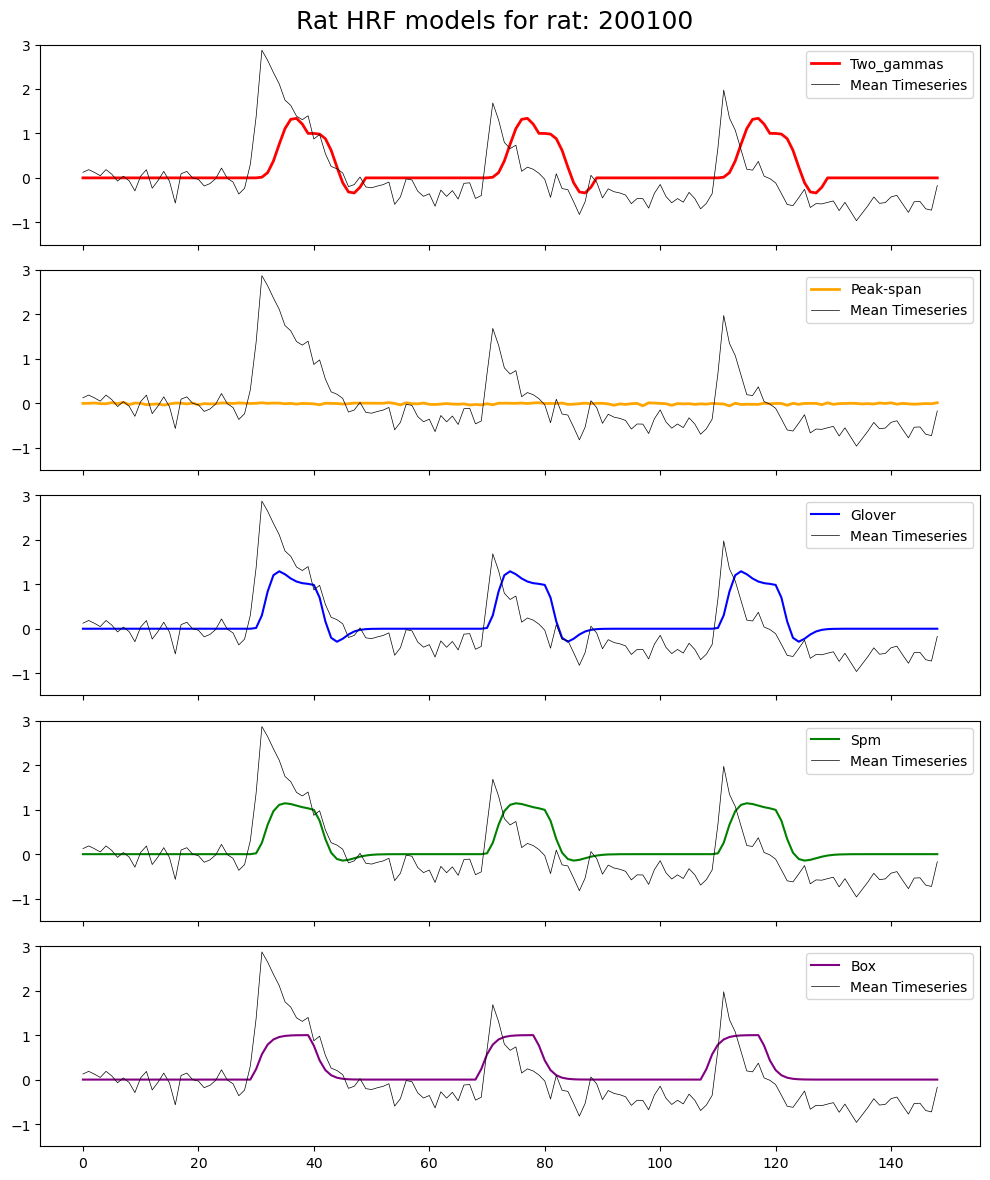

In [6]:
# --- Compute average --- 
all_timeseries = []
all_residuals = []

ds='01'
ds_subj = 200100

for subj_num in range(0,10):
    try:
        residuals_csv = pd.read_csv(Peak_span_path + f'residuals/residuals_sub-020{ds}0{subj_num}_ses-1.csv')
        mean_residuals = (residuals_csv.mean(axis=1) - residuals_csv.mean(axis=1).mean()) / residuals_csv.mean(axis=1).std()
        
        # Append mean residuals to the list
        all_residuals.append(mean_residuals)
        
        timeseries_csv = pd.read_csv(Peak_span_path + f'real_timeseries/real_timeseries_sub-020{ds}0{subj_num}_ses-1.csv')
        mean_timeseries = (timeseries_csv.mean(axis=1) - timeseries_csv.mean(axis=1).mean()) / timeseries_csv.mean(axis=1).std()
        # Append mean timeseries to the list
        all_timeseries.append(mean_timeseries)
    except FileNotFoundError:
        print(f'Cannot find, ds: {ds} sub:{subj_num}')
        continue
# Compute the average of all timeseries/residuals across subjects
average_timeseries = pd.concat(all_timeseries, axis=1).mean(axis=1)
average_residuals = pd.concat(all_residuals, axis=1).mean(axis=1)


# --- Load data ---

g_model = pd.read_csv(first_level_path+f'Two_gammas/matrix/matrix_sub-0{ds_subj}_ses-1.csv')
g_model = g_model.iloc[:,1]

dd_model = pd.read_csv(first_level_path+f'Peak_span/matrix/matrix_sub-0{ds_subj}_ses-1.csv')
dd_model = dd_model.iloc[:,1]

glover_model = pd.read_csv(first_level_path+f'glover/matrix/matrix_sub-0{ds_subj}_ses-1.csv')
glover_model = glover_model.iloc[:,0]

spm_model = pd.read_csv(first_level_path+f'spm/matrix/matrix_sub-0{ds_subj}_ses-1.csv')
spm_model = spm_model.iloc[:,0]

box_model = pd.read_csv(first_level_path+f'Peak_span/matrix/matrix_sub-0{ds_subj}_ses-1.csv')
box_model = box_model.iloc[:,0]

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

# Plot model and residuals in the first subplot (ax1)
ax1.plot(g_model, color='red', linewidth=2, label='Two_gammass')
ax2.plot(dd_model, color='orange', linewidth=2, label='Peak-span' )
ax3.plot(glover_model, color='blue', linewidth=1.5, label='Glover' )
ax4.plot(spm_model, color='green', linewidth=1.5, label='Spm' )
ax5.plot(box_model, color='purple', linewidth=1.5, label='Box' )

ax1.plot(average_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')
ax2.plot(average_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')
ax3.plot(average_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')
ax4.plot(average_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')
ax5.plot(average_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax5.legend()

ax1.set_ylim(-1.5, 3)
ax2.set_ylim(-1.5, 3)
ax3.set_ylim(-1.5, 3)
ax4.set_ylim(-1.5, 3)
ax5.set_ylim(-1.5, 3)

fig.suptitle(f"Rat HRF models for rat: {ds_subj}", fontsize=18)
plt.tight_layout()

#plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/compare_sec_level/averaged_residuals/all_HRF_timeseries_{ds_subj}.svg', format='svg', dpi=1200) 
plt.show()